In [1]:
import pandas as pd
import numpy as np

data_cu_2=pd.read_csv('../Data/01_Courses_usagers/2023_06/All_data_courses_usagers_06_2023.csv', sep=",")
data_remp_2=pd.read_csv('../Data/02_Historique_remplissage_stations/2023_06/All_data_remplissage.csv', sep=",")
#data_mouv_2=pd.read_excel('../Data/03_Régulation_mouvements_stations/2023_02/2023-02-01_Mouvements_de_régulation.xlsx')
data_remp_2.head()

,Code station,station_name,longitude,latitude,Date mise à jour,VM_Av,VAE_AV,VM_Unav,VAE_Unav,station_name.1,VM disponibles (Station +),VAE disponibles (Station +),VM indisponibles (Station +),VAE indisponibles (Station +),Nombre de cables disponibles (Station +)
0,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-01 00:03:00,0,0,2,1,14,0,0,0,0,NaN
1,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-01 00:06:00,2,0,2,1,12,0,0,0,0,NaN
2,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-01 00:09:00,0,0,1,1,15,0,0,0,0,NaN
3,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-01 00:24:00,0,1,1,1,14,0,0,0,0,NaN
4,1001,Quai de l'Horloge - Pont Neuf,2.341798,48.857059,2023-06-01 00:27:00,0,0,1,1,15,0,0,0,0,NaN


Ici je détermine le taux de remplissage moyen par station en supposant que la capicité totale est le nombre de dispo+indispo

In [2]:
data_remp_2['dispo']=data_remp_2['VM_Av']+data_remp_2['VAE_AV']
data_remp_2['indis']=data_remp_2['VM_Unav']+data_remp_2['VAE_Unav']
data_remp_2['occ']=data_remp_2['dispo'] / (data_remp_2['dispo']+data_remp_2['indis'])
data_cu_2

,id_velo,is_VAE,Id_user,date_depart,date_arrive,distance,duration,max_speed,from_stat,Latitude_start,longitude_start,start_station_status,to_stat,latitude_end,longitude_end,end_station_status
0,2041,True,38607,2023-06-01 17:06:24,2023-06-01 17:22:17,3367,947,27,Choiseul - Quatre Septembre,48.869936,2.335998,NORMALE,Square des Epinettes,48.893839,2.325954,NORMALE
1,2041,True,4877,2023-06-01 17:22:58,2023-06-01 17:31:47,1999,523,24,Square des Epinettes,48.893839,2.325954,NORMALE,Place Pigalle,48.882756,2.336157,VIDE
2,2041,True,84894,2023-06-01 18:25:56,2023-06-01 19:05:45,10011,2384,28,Place Pigalle,48.882756,2.336157,NORMALE,Charles Frérot - Albert Guilpin,48.815584,2.350503,NORMALE
3,2041,True,243200,2023-06-01 19:11:25,2023-06-01 19:29:43,4455,1093,28,Charles Frérot - Albert Guilpin,48.815584,2.350503,NORMALE,Charenton - Wattignies,48.836676,2.391796,NORMALE
4,2041,True,133905,2023-06-01 19:31:12,2023-06-01 20:00:51,5958,1774,23,Charenton - Wattignies,48.836676,2.391796,NORMALE,Quai de Valmy,48.881270,2.368186,NORMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543730,71391,True,126850,2023-06-30 20:32:08,2023-06-30 21:03:51,8598,1898,29,Paul Klee - Place Augusta Holmes,48.838946,2.370424,NORMALE,Pergolèse - Marbeau,48.873569,2.281513,NORMALE
4543731,71391,True,34698,2023-06-30 21:33:37,2023-06-30 21:42:57,3185,554,27,Guersant - Gouvion-Saint-Cyr,48.882878,2.287667,NORMALE,Legendre - Clichy,48.888962,2.322529,NORMALE
4543732,71391,True,96840,2023-06-30 21:51:01,2023-06-30 21:54:11,877,185,26,Clichy - Douai,48.884118,2.328729,NORMALE,Naples - Rome,48.879961,2.321359,NORMALE
4543733,71391,True,369329,2023-06-30 21:56:51,2023-06-30 22:52:18,6361,3322,33,Naples - Rome,48.879961,2.321359,NORMALE,Bourg l'Abbé - Saint-Martin,48.863933,2.352406,NORMALE


Quelles sont les stations les plus occupées ?

In [3]:
occupation=data_remp_2.groupby('station_name')['occ'].mean().reset_index()
occupation.sort_values(by=['occ'])

,station_name,occ
1380,Verdun - Henri Barbusse,0.504662
493,Gare du Nord - La Chapelle,0.505358
484,Gare de l'Est - Fidélité,0.546269
135,Boudreau - Auber,0.552464
78,Batignolles - Place de Clichy,0.575424
...,...,...
778,Malakoff - Place de la Porte Maillot,1.000000
462,Gare d'Argenteuil,1.000000
466,Gare de Bellevue,1.000000
991,Place Georges Guillaumin,1.000000


Ici je repère quel est le jour le moins actif et quelle est l'heure la moins active. Une date de départ et une date d'arrivée content chaque comme 1 activité

In [4]:
data_cu_2['date_depart'] = pd.to_datetime(data_cu_2['date_depart'])
data_cu_2['date_arrive'] = pd.to_datetime(data_cu_2['date_arrive'])

all_activities = pd.concat([data_cu_2['date_depart'], data_cu_2['date_arrive']])
all_activities_hour = all_activities.dt.hour
min_hour = all_activities_hour.value_counts().idxmin()
all_activities_day = all_activities.dt.date
min_day = all_activities_day.value_counts().idxmin()

print("Moment de la journée avec le moins d'activité:", min_hour, "h00")
print("Journée avec le moins d'activité:", min_day)

Moment de la journée avec le moins d'activité: 5 h00
Journée avec le moins d'activité: 2023-05-03


Création d'un dataframe indiquant le nombre de départ et le nombre d'arrivées par station

In [5]:
depart_counts = data_cu_2['from_stat'].value_counts()
arrivee_counts = data_cu_2['to_stat'].value_counts()
activite_station = pd.DataFrame({
    'Station': depart_counts.index,
    'Nb_departs': depart_counts.values,
    'Nb_arrivees': arrivee_counts.reindex(depart_counts.index, fill_value=0).values
})
activite_station['remplissage']=activite_station['Nb_arrivees']-activite_station['Nb_departs'] #correspond au nombre de vélos en + ou en - sur le mois
activite_station

,Station,Nb_departs,Nb_arrivees,remplissage
0,Richard Lenoir - Place de la Bastille,15802,15506,-296
1,Gare Saint-Lazare - Cour du Havre,15482,15470,-12
2,Gare de Lyon - Place Louis Armand,14597,14567,-30
3,Place Mireille Havet,12785,12564,-221
4,Gare RER de Vincennes,11943,11708,-235
...,...,...,...,...
1439,Gare RER les Ardoines,8,8,0
1440,Hôpital Européen Georges Pompidou,4,1,-3
1441,Stade Gaston Bouillant,4,8,4
1442,Gare de l'Est - Verdun,3,0,-3


Idée: faire des couples de stations avec une en remplissage négatif et une remplissage positive. Les couples seront formés en fonction de leur distance où la distance corrospond à la latitude, la longitude et la valeur absolue de remplissage; avec ces 3 données centrées réduites. Il faut adapter le code pour avoir un remplissage celon le type de vélo. Problème: si une station à un remplissage négatif pour les vélos électriques et positif pour les autres vélos, il faut faire un aller-retour. Solution former des couples par type de vélo. Remarque: la latitude et la longitude ne sont pas des bons représentatifs de distance car les navettes ne se déplacent pas en distance euclidienne, la durée et la distance parcourue peuvent donner un meilleur apercu de la distance à parcourir par la navette.

In [6]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix

features=['remplissage', 'Latitude station prise', 'Longitude station prise']
# Séparer les stations en fonction du remplissage
stations_remplissage = activite_station[activite_station['remplissage'] > 0].copy()
stations_vidage = activite_station[activite_station['remplissage'] < 0].copy()
stations_vidage['remplissage']=np.abs(stations_vidage['remplissage'])

Il existe des stations mouvantes, elles apparaissent 2 fois mais avec des positions différentes

In [7]:
stations = data_cu_2.loc[:, ['from_stat', 'Latitude_start', 'longitude_start']].drop_duplicates().reset_index(drop=True)
stations = stations.rename(columns={'from_stat': 'nom', 'Latitude_start': 'latitude', 'longitude_start': 'longitude'})
stations

,nom,latitude,longitude
0,Choiseul - Quatre Septembre,48.869936,2.335998
1,Square des Epinettes,48.893839,2.325954
2,Place Pigalle,48.882756,2.336157
3,Charles Frérot - Albert Guilpin,48.815584,2.350503
4,Charenton - Wattignies,48.836676,2.391796
...,...,...,...
1499,Place de la Nation - Taillebourg,48.848841,2.397304
1500,Redoute - Les Courtilles,48.929867,2.283670
1501,Charles de Gaulle - Beauté,48.836597,2.479796
1502,Stade Gaston Bouillant,48.940274,2.327420


Le total de vélos à transférer dans le mois

In [8]:
stations_remplissage.remplissage.sum()

80518

Dans la suite du problème il est important que les sommes des fréquences de remplissage s'équilibrent pour faire 0. La sélection des stations n'est pas tout à fait aléatoire

In [9]:
stations_remplissage = stations_remplissage.sample(n=15)
n = stations_remplissage.remplissage.sum()

stations_vidage2 = pd.DataFrame(columns=stations_vidage.columns)

while stations_vidage2.remplissage.sum() != n:
    while stations_vidage2['remplissage'].sum() < n:
        stations_vidage2 = pd.concat([stations_vidage2, stations_vidage.sample(1)], ignore_index=True)
        
    while stations_vidage2.remplissage.sum() > n:
        stations_vidage2 = stations_vidage2.drop(stations_vidage2.sample(1).index)

stations_vidage=stations_vidage2
stations_remplissage=stations_remplissage.reset_index(drop=True)
stations_vidage=stations_vidage.reset_index(drop=True)

In [10]:
stations_remplissage.remplissage.sum(), stations_remplissage.remplissage.sum()

(2866, 2866)

In [14]:
pos_station_vidage = stations.loc[stations['nom'].isin(stations_vidage['Station']), :]
pos_station_remplissage = stations.loc[stations['nom'].isin(stations_remplissage['Station']), :]

pos_station_remplissage=pos_station_remplissage.drop_duplicates(subset=['nom']).reset_index(drop=True)
pos_station_vidage=pos_station_vidage.drop_duplicates(subset=['nom']).reset_index(drop=True)

In [ ]:
Tentative échouée de représenter les trajets sur la carte

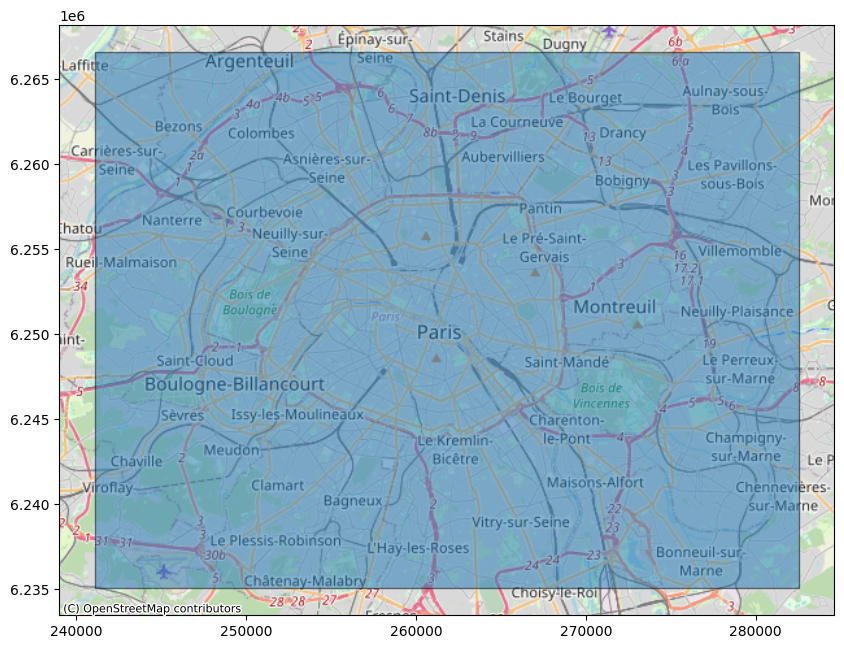

In [12]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as pl
from shapely.geometry import box

bbox = (stations.longitude.min(), stations.latitude.min(), stations.longitude.max(), stations.latitude.max())
geometry = [box(*bbox)]
gdf = gpd.GeoDataFrame({'geometry': geometry}, crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
pl.savefig('paris_map.png')
pl.show()

In [ ]:
Ce code affiche parfois une erreur, il fois alors sélectionner un nouvel échantillon de stations

ValueError: s must be a scalar, or float array-like with the same size as x and y

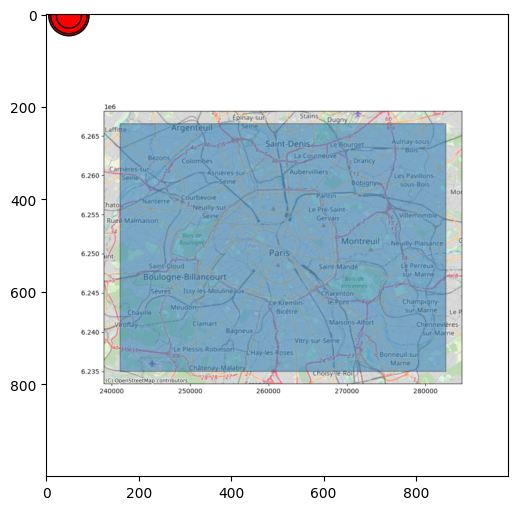

In [13]:
import pylab as pl
import ot
import time
import matplotlib.image as mpimg

r_remplissage=pd.to_numeric(stations_remplissage['remplissage'])
v_remplissage=pd.to_numeric(stations_vidage['remplissage'])
lat_remplissage=pos_station_remplissage['latitude'].values
long_remplissage=pos_station_remplissage['longitude'].values
lat_vidage=pos_station_vidage['latitude'].values
long_vidage=pos_station_vidage['longitude'].values

paris_map = mpimg.imread('paris_map.png')
pl.figure(1,(7,6))
pl.clf()
pl.imshow(paris_map, interpolation='bilinear')
pl.scatter(lat_remplissage, long_remplissage, s=r_remplissage, c='red', ec='k', label='stations remplissage')
pl.scatter(lat_vidage, long_vidage, s=v_remplissage, c='green', ec='k', label='stations vidage')
pl.legend()
pl.title('stations de vélos')

In [ ]:
C = ot.dist(pos_station_remplissage[['latitude','longitude']].values, pos_station_vidage[['latitude','longitude']].values)

f1 = pl.figure(1, (7,7))
pl.clf()
pl.subplot(121)
#pl.imshow(Imap, interpolation='bilinear')
for i in range(len(stations_vidage)):
    pl.text(pos_station_vidage.loc[i, 'latitude'], pos_station_vidage.loc[i, 'longitude'], stations_vidage.Station[i], color='blue', fontsize=14, fontweight='bold', ha='center', va='center')
for i in range(len(stations_remplissage)):
    pl.text(pos_station_remplissage.loc[i, 'latitude'], pos_station_remplissage.loc[i, 'longitude'], stations_remplissage.Station[i], color='blue', fontsize=14, fontweight='bold', ha='center', va='center')
pl.title('stations en remplissage et en vidage')
pl.xlabel('Latitude')
pl.ylabel('Longitude')
pl.show()

In [ ]:
Matrice des distances

In [ ]:
f2 = pl.figure(2, (7, 7))
pl.clf()
im = pl.imshow(C, cmap='coolwarm')
pl.title('Matrice de coût')
pl.xticks(ticks=np.arange(len(stations_vidage)), labels=stations_vidage['Station'], rotation=45, ha='right')
pl.yticks(ticks=np.arange(len(stations_remplissage)), labels=stations_remplissage['Station'])
cbar = pl.colorbar(im, shrink=0.5)
cbar.ax.set_ylabel("Coût", rotation=-90, va="bottom")
pl.xlabel('Stations vidage')
pl.ylabel('Stations remplissage')
pl.savefig('matrice_de_cout')
pl.show()

In [ ]:
start = time.time()
ot_emd = ot.emd(stations_remplissage['remplissage'].values, stations_vidage['remplissage'].values, C)
time_emd = time.time() - start

Matrice des coûts

In [ ]:
f = pl.figure(3, (14,7))
pl.clf()
pl.subplot(121)
#pl.imshow(paris_map, interpolation='bilinear')
for i in range(len(pos_station_remplissage)):
    for j in range(len(pos_station_vidage)):
        pl.plot([pos_station_remplissage.loc[i,'latitude'], pos_station_vidage.loc[j,'latitude']], [pos_station_remplissage.loc[i,'longitude'], pos_station_vidage.loc[j,'longitude']], '-k', lw=3. * ot_emd[i, j] / ot_emd.max())
for i in range(len(pos_station_vidage)):
    pl.text(pos_station_vidage.loc[i, 'latitude'], pos_station_vidage.loc[i, 'longitude'], stations_vidage.Station[i], color='red', fontsize=7, fontweight='bold', ha='center', va='center')
for i in range(len(pos_station_remplissage)):
    pl.text(pos_station_remplissage.loc[i, 'latitude'], pos_station_remplissage.loc[i, 'longitude'], stations_remplissage.Station[i], color='blue', fontsize=7, fontweight='bold', ha='center', va='center')

pl.title('Viusalisation des différents transports possibles')
pl.savefig('trajets_transports')

Graphe des transfert de vélos

In [ ]:
ax = pl.subplot(122)
im = pl.imshow(ot_emd)
for i in range(len(stations_remplissage)):
    for j in range((len(stations_vidage))):
        text = ax.text(j, i, '{0:g}'.format(ot_emd[i, j]), ha="center", va="center", color="w")
pl.xticks(ticks=np.arange(len(stations_vidage)), labels=stations_vidage['Station'], rotation=45, ha='right')
pl.yticks(ticks=np.arange(len(stations_remplissage)), labels=stations_remplissage['Station'])
pl.title('Matrice des répartitions')

pl.xlabel('stations vidage')
pl.ylabel('stations remplissage')
pl.savefig('Matrice_repartitions')

In [ ]:
data_remp_2.rename(columns={'station_name': 'Station'}, inplace=True)

data_dispo_rempl=pd.DataFrame()
data_dispo_rempl['Station']=activite_station['Station']
data_dispo_rempl['VM_av']=data_remp_2.groupby('Station')['VM_Av'].mean().reset_index(drop=True)
data_dispo_rempl = pd.merge(data_dispo_rempl, activite_station, on='Station', how='inner')
data_dispo_rempl

In [ ]:
data_dispo_rempl

La variable frequ_appro correspond au nombre de jour maximum d'un transfert à un autre. Le nombre me paret trop petit, 1 transfert par jour c'est trop

In [ ]:
data_dispo_rempl['frequ_appro'] = (28*data_dispo_rempl['VM_av']) / data_dispo_rempl['remplissage']
data_dispo_rempl.dropna()

Le résultat est 4, vendredi est le jour où il y a le plus d'activité

In [ ]:
pd.to_datetime(data_cu_2['date_depart']).dt.dayofweek.value_counts().idxmax()

Dimanche est le jours où il y a le moins d'activité

In [ ]:
pd.to_datetime(data_cu_2['date_arrive']).dt.dayofweek.value_counts().idxmin()